## SG - UK Road Accidents - Report

### IBM Applied Data Science Capstone Project

#### Table of contents

* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Data Analysis and Visualisation](#dataav)
* [Making and Running the Models](#makrunmod)
* [Results and Discussion](#resultsanddiscussion)
* [Conclusion](#conclusion)

### Introduction  <a name="introduction"></a>

In 2018 (the last year for which there are complete annual records), there were 1,784 reported road deaths and 25,511 serious injuries in car accidents in the United Kingdom. This level is similar to that of all 6 years since 2012 and, although there was a decline in the first decade of the 21st century, deaths have stabilised around this mark.

Although the decline that occurred from 2000 to 2012 is overwhelmingly positive, 1,784 road deaths and 25,511 serious injuries is still too many. These incidents cause untold emotional damage to those surrounding the casualties, as well as a significant amount of damage to the economy of the United Kingdom. Indeed, a report from Fonesca Law (a solicitors firm in the UK) in 2014 (when road deaths were roughly the same as they were in 2018) argues that road accidents cost the national economy almost £15 billion, partially due to vehicle and property damages, police costs and insurance costs.

The aim of this project, therefore, is to perform data analysis and visualisation which indicates the features which make a road accident more likely, and to build a set of machine learning models which can predict accident severity.

Having observed the analysis and used the model, it is hoped that drivers will consequently be able to change their driving habits accordingly, and thus be less likely to have an accident. If there is sufficient uptake of the analysis and the model, it might be possible to reduce the number of road deaths and road injuries per year by a significant margin. However, even if just a few people observe the data analysis and use the model, and change their behaviour, leading to higher levels of safety on the UK’s roads, this would be justification enough for this project.

### Data <a name="data"></a>

#### The Nature of the Available Data <a name="the nature of the available data"></a>

Data on the subject of road accidents is readily available through the UK government. Indeed, each year the Department for Transport releases information on road accidents and road casualties, downloadable in CSV format. Each annual accident dataset tends to include around 120,000 observations (rows) and exactly 32 attributes (columns). For each accident that occurs, the Department records location, accident severity, the number of vehicles involved, the number of casualties, the day of the week, the time, the road classes (i.e. motorway, A-road etc.) of each road involved, road type (roundabout, one-way street, dual carriageway etc.), the speed limit, details regarding the junction, the type of controls at the junction (traffic lights, none etc.), the light conditions, the weather conditions, the road surface conditions, whether there were any hazards on the carriageway, and whether the accident occurred in an urban or rural (or unassigned) area. The 120,000 observations from a single year should be more than enough for effective data analysis and the construction of a good machine learning model. The features which I think will be most telling are speed limit, light conditions, junction details, weather conditions, urban or rural area and road surface conditions.

Though the data is readily available, it is formatted in such a way that is not conducive to immediate analysis. There are many missing values (coded as various things, from -1 to 6 depending on the attribute), variables whose datatype is not conducive to analysis, unnecessary attributes (such as ‘Did_Officer_Attend_Scene_of_Accident’) and variables which should not be used because they might unfairly affect the model (for instance, using ‘Number_of_Casualties’ as a predictor for accident severity would be unwise, since it is something which one cannot know before one actually has an accident, and because it would lead to a less useful model). Consequently, a large amount of data pre-processing will have to occur before anything can be done.

That said, I am optimistic about the results of using this dataset, and I look forward to observing the results of this project.

#### Understanding The Data <a name="understanding the data"></a>

The following shows the meaning of each value in each relevant field (source UK Gov Variable Lookup Spreadsheet):

Accident Index: (self-explanatory)

Accident Severity: 1 = fatal; 2 = serious; 3 = slight

Number of Vehicles: (self-explanatory)

Number of Casualties: (self-explanatory; casualty refers to anyone even slightly injured in the accident)

Day of Week: 1 = Sunday; 2 = Monday; 3 = Tuesday; 4 = Wednesday; 5 = Thursday; 6 = Friday; 7 = Saturday

Time: (self-explanatory – GMT)

Road Class: 1 = motorway; 2 = A(M); 3 = A; 4 = B; 5 = C; 6 = unclassifed

Road Type: 1 = Roundabout; 2 = one-way street; 3 = dual carriageway; 6 = single carriageway; 7 = slip road; 9 = unknown; 12 = one-way street or slip road; -1 = data missing or out of range

Speed Limit: (self-explanatory – MPH)

Junction Detail: 0 = not at a junction or within 20 metres; 1 = roundabout; 2 = mini-roundabout; 3 = T or staggered junction; 5 = slip road; 6 = crossroads; 7 = more than 4 arms (not a roundabout); 8 = private drive or entrance; 9 = other junction; -1 = data missing or out of range

Junction control: 0 = not at junction or within 20 metres; 1 = authorised person; 2 = auto traffic signal; 3 = stop sign; 4 = give-way or uncontrolled; -1 = data missing or out of range

Light Conditions: 1 = daylight; 4 = darkness – lights lit; 5 = darkness lights unlit; 6 – darkness – no lighting; 7 = darkness; -1 = data missing or out of range

Weather: 1 = fine, no high winds; 2 = raining, no high winds; 3 = snowing, no high winds; 4 = fine + high winds; 5 = raining + high winds; 6 = snowing + high winds; 7 = fog or mist; 8 = other; 9 = unknown; -1 = data missing or out of range

Road Surface Conditions: 1 = dry; 2 = wet or damp; 3 = snow; 4 = frost or ice; 5 = flood over 3cm deep; 6 = oil or diesel on road; 7 = mud on road; -1 = data missing or out of range

Special Conditions at Site: 0 = none; 1 = auto traffic signal is out; 2 = auto traffic signal part defective; 3 = road sign or marking is defective or obscured; 6 = oil or diesel; 7 = mud

Carriageway Hazards: 0 = none; 1 = vehicle load on road; 2 = other object on road; 3 = previous accident; 4 = dog on road; 5 = other animal on road; 6 = pedestrian in carriageway – not injured; 7 = any animal in carriageway (except ridden horse, they’re ok); -1 data missing or out of range

Urban or Rural Area = 1 = Urban; 2 = rural; 3 = unallocated

### Methodolody <a name="methodology"></a>

This section will be split into two sub-sections: data analysis and visualisation, and modelling. 

#### Data Analysis and Visualisation <a name="dataav"></a>

In order to ascertain which features have an effect on accident severity, we should analyse and visualise the data at hand. 

In [61]:
#Importing various libraries for this project

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


In [62]:
df = pd.read_csv("http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Accidents_2018.csv")

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [63]:
df['Date'] = pd.to_datetime(df['Date'])

### Speed Limit - Bar Chart

<function matplotlib.pyplot.show(*args, **kw)>

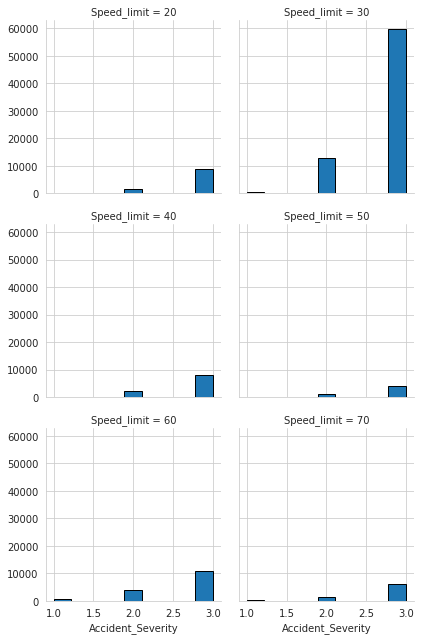

In [64]:
import seaborn as sns

bins = np.linspace(df.Accident_Severity.min(), df.Accident_Severity.max(), 10)
g = sns.FacetGrid(df, col = 'Speed_limit', palette = 'Set1', col_wrap=2)
g.map(plt.hist, 'Accident_Severity', bins=bins, ec = 'k')

plt.show

This shows that one is most likely to have an accident with slight injury in a 30 mph area, and most likely to have a fatal accident in a 60 mph area.

It interestingly shows that you're more likely to have a fatal accident in a 30 zone than a 40 zone; in analysing this, we must remember that this dataset includes pedestrian deaths, and that most 30 areas are in residential zones, where pedestrians may be present, while most 40 zones are on A Roads and B Roads, where they are less likely to be.



### Light Conditions - Bar Chart

<function matplotlib.pyplot.show(*args, **kw)>

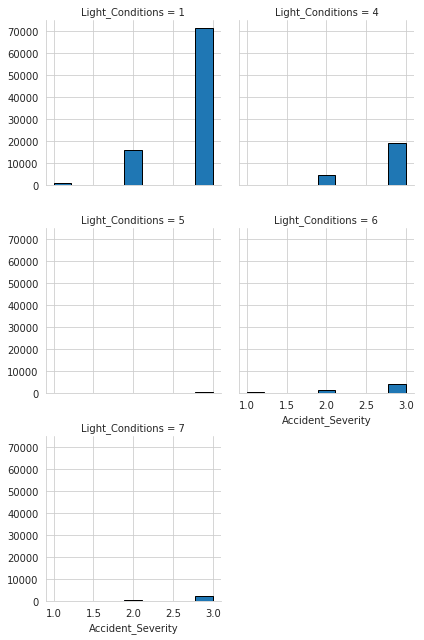

In [65]:
bins = np.linspace(df.Accident_Severity.min(), df.Accident_Severity.max(), 10)
g = sns.FacetGrid(df, col = 'Light_Conditions', palette = 'Set2', col_wrap=2)
g.map(plt.hist, 'Accident_Severity', bins=bins, ec = 'k')

plt.show

This shows that most accidents occur in daylight (1). This is unsurprising, as it seems heuristically sensible to assume that most car journeys take place in daylight. More interestingly, it seems that very few accidents take place in darkness, with lights unlit (5). This would suggeset that the British public tends to abide by this particular road safety guideline very well. There are plenty of accidents which occur in darkness, with lights lit (4) (this correlates with the notion that many accidents occur in 30 mph zones, where street lights are in place), and fewer, but still a significant number, in darkness with no lighting (6). Perhaps this reflects the notion that people are happier to drive at night in urban areas (which will be lit) than rural areas (which will not be lit). 

Drivers should not assume that driving in the day precludes you from having an accident, and should be aware of the relative hazards of driving in the dark. 


### Date - Scatter Plot

TypeError: invalid type promotion

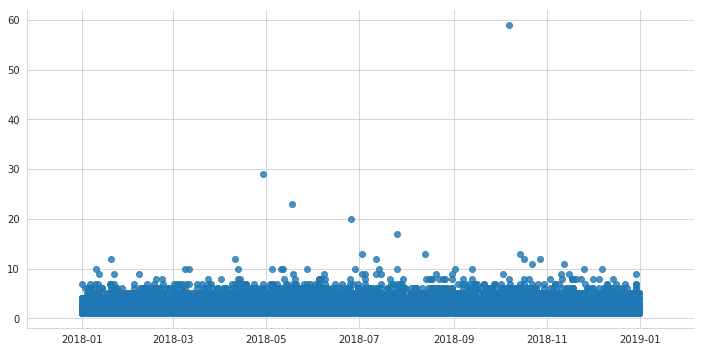

In [66]:
sns.set_style("whitegrid")
g = sns.lmplot(x = "Date", y = "Number_of_Casualties", data = df, aspect = 2)
g = (g.set_axis_labels("Date", "Number of Casualties"))
set(xlim = (2018,2019), ylim = (0, 4))

plt.show(g)

There doesn't seem to be a noticeable correlation between accident severity and date at this level.
This would suggest that drivers needn't worry too much about the time of year when they set out (though they should worry about other factors which relate to time of year, such as weather conditions). 

There are individual days when there are few accidents (e.g. Christmas Day), but these are outliers.

### Urban or Rural - Bar Chart (Overall) and Waffle Chart (County Specific)

In [ ]:
df.shape

In order to reduce the computational time of this action, I will group the data by local authority, and then check the results for one of these local authority areas. First, however, I'll check how things look in a bar chart.

In [ ]:
df = df[df.Urban_or_Rural_Area != -1]

In [ ]:
bins = np.linspace(df.Accident_Severity.min(), df.Accident_Severity.max(), 10)
g = sns.FacetGrid(df, col = 'Urban_or_Rural_Area', palette = 'Set2', col_wrap=2)
g.map(plt.hist, 'Accident_Severity', bins=bins, ec = 'k')

plt.show

This would suggest that more accidents occur in urban areas than rural areas by a significant margin. The gap in slight accidents is large, but the gap in serious accidents and fatalities is much lesser. This is likely to be reflecting higher speeds in rural areas.

Drivers ought to be careful in urban areas, and not get complacent about the low speed limits and street lighting. 

However, they should also be aware that higher speed limits in rural areas pose higher risks.

The section below contains data processing for the purpose of making a waffle chart.

In [ ]:
df_redoneforwaffle = df.drop(['Accident_Severity', 'Accident_Index', 'Location_Northing_OSGR', 'Longitude', 'Latitude',  'Location_Easting_OSGR', 'Local_Authority_(Highway)', 'Police_Force', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time', '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit', 'Junction_Detail', 'Junction_Control', '2nd_Road_Class', '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location'], axis = 1)

In [ ]:
df_localauthority = df_redoneforwaffle.sort_values('Local_Authority_(District)', axis = 0, ascending = True, inplace = False, kind = 'quicksort')

Looking at this information for completely urban or completely rural areas will be useless. We therefore need to look at a few areas which are made up of some urban and some rural areas. This is tricky, since local authorities in the UK are often structured around towns. For that reason, let's take a look at a selection of local authorities which all make up a single county. For instance, North Warwickshire, Nuneaton and Bedworth, Rugby, Stratford-upon-Avon and Warwick ollectively make up Warwickshire.


In [ ]:
df_WARWPART1 = df_localauthority[df_localauthority['Local_Authority_(District)'] >= 290]
                                   
df_WARWPART2 = df_WARWPART1[df_WARWPART1['Local_Authority_(District)'] <= 295]
                              

In [ ]:
df_WARWPART2['Urban_or_Rural_Area'].value_counts()

In [ ]:
category_proportions = [0.34570957, 0.65429042]

In [ ]:
width = 30
height = 10

total_num_tiles = width * height

print('Total Number of Tiles Is', total_num_tiles)

In [67]:
urban_tiles = 300 * 0.34570957
rural_tiles = 300 * 0.65429042

print(urban_tiles)

print(rural_tiles)

#So, 104 urban tiles, 196 rural tiles

tiles_per_category = [104, 196]

103.712871
196.287126


In [68]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [69]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1

<Figure size 432x288 with 0 Axes>

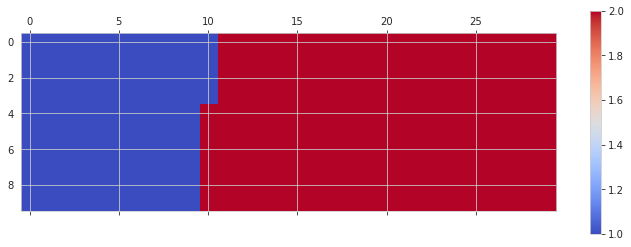

In [70]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

([], <a list of 0 Text yticklabel objects>)

<Figure size 432x288 with 0 Axes>

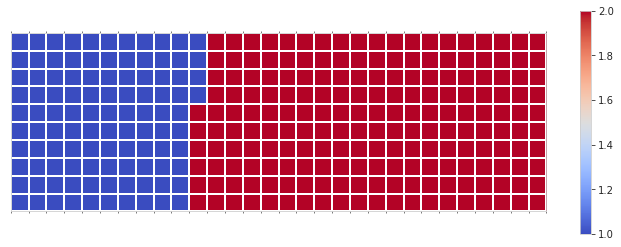

In [71]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

In the above waffle chart, blue squares represent accidents in urban areas, and red squares represent accidents in rural areas. 

As one can see, in Warwickshire, a county with some urban and some rural areas the skew is not towards urban areas, but rural areas. 

This result, in comination with the bar chart earlier, would suggest that people cannot be complacent in rural areas, and should be looking out for different risks depending on where they live. 

For Warwickshire, and most likely other midlands counties with similar structures, like Gloucestershire and Worcestershire, you're more likely to have an accident in a rural area, but can't take your eye off the ball in urban areas either.

### Number of Vehicles - Bar Chart

<function matplotlib.pyplot.show(*args, **kw)>

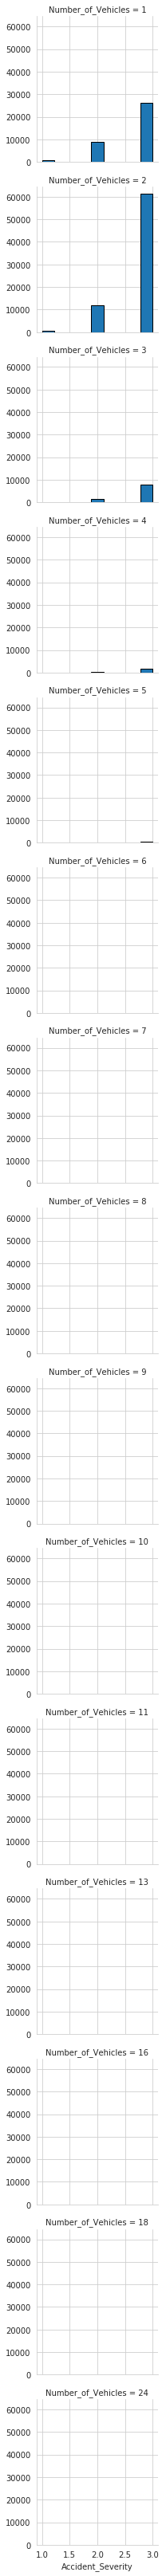

In [72]:
bins = np.linspace(df.Accident_Severity.min(), df.Accident_Severity.max(), 10)
g = sns.FacetGrid(df, col = 'Number_of_Vehicles', palette = 'Set6', col_wrap= 1)
g.map(plt.hist, 'Accident_Severity', bins=bins, ec = 'k')

plt.show

This analysis shows that a lot of accidents occur involving 2 vehicles, and that the next most accidents occur with just a single vehicle. 

This is an interesting discovery. It implies two major things. Firstly, the fact that a very large number of accidents are slight and between two vehicles suggests that a lot of these indicents might involve one car rear-ending another (i.e. a fender bender). This should be noted when one reads accident data, and accounted for, when one drives. Secondly, the large number of injuries involving one vehicle implies that drivers should be very careful even when the road is empty - lapses in concentration, lost control etc. can lead to a single vehicle having an accident a lot of the time.

### Day of Week - Bar Chart

<function matplotlib.pyplot.show(*args, **kw)>

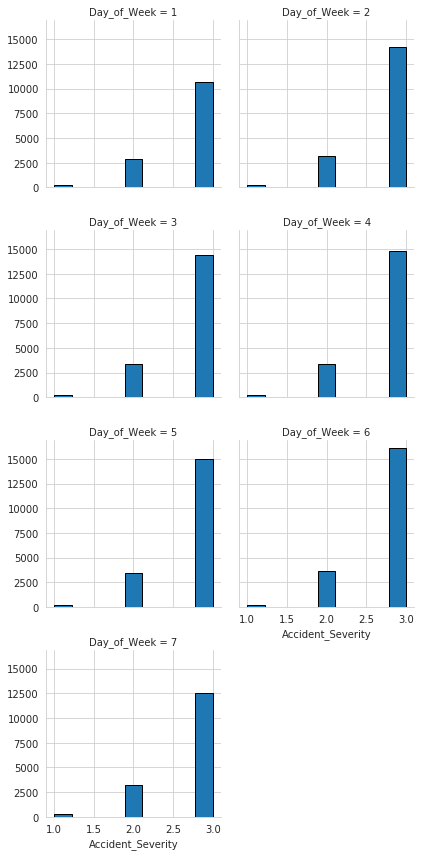

In [73]:
bins = np.linspace(df.Accident_Severity.min(), df.Accident_Severity.max(), 10)
g = sns.FacetGrid(df, col = 'Day_of_Week', palette = 'Set3', col_wrap=2)
g.map(plt.hist, 'Accident_Severity', bins=bins, ec = 'k')

plt.show

The most interesting thing which this shows is that there are fewer accidents on days 1 and 7 (Saturday and Sunday) i.e. the days when people are not going to work. This would suggest that driving in a rush (derived from needing to get to work, or trying to get home asap) and driving on days when there are more people on the roads, can be more dangerous.

Drivers should be particularly cautious on weekdays. 

### Road Surface Conditions - Bar Chart

<function matplotlib.pyplot.show(*args, **kw)>

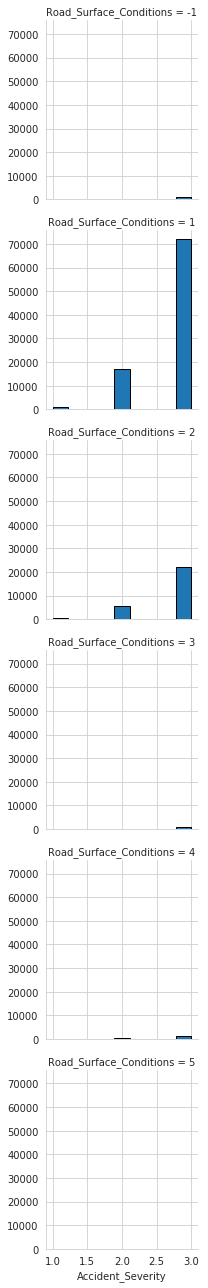

In [74]:
bins = np.linspace(df.Accident_Severity.min(), df.Accident_Severity.max(), 10)
g = sns.FacetGrid(df, col = 'Road_Surface_Conditions', palette = 'Set4', col_wrap=1)
g.map(plt.hist, 'Accident_Severity', bins=bins, ec = 'k')

plt.show

The most important takeaway from this visualisation is the fact that dry conditions (1) do not protect you from being in an accident.

#### Modelling <a name="modelling"></a>

Before we can model using this data, we need to perform some data wrangling tasks.

##### Data Wrangling for Modelling <a name="data wrangling for modelling"></a>

In [75]:
#Removing unneccessary attributes from the dataframe. 

df.drop(['Accident_Index', 'Police_Force', 'Local_Authority_(District)', 'Local_Authority_(Highway)', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location'], axis = 1, inplace = True)

In [76]:
#Checking for missing values for Road Class, Road Type, Junction Detail, Junction Control, Light Conditions, Weather, Road Surface Conditions, Carriageway Hazards

print("number of NaN values for the column 1st Road Class :", df['1st_Road_Class'].isnull().sum())
print("number of NaN values for the column 2nd Road Class :", df['2nd_Road_Class'].isnull().sum())
print("number of NaN values for the column Road Type :", df['Road_Type'].isnull().sum())
print("number of NaN values for the column Junction Detail :", df['Junction_Detail'].isnull().sum())
print("number of NaN values for the column Junction Control :", df['Junction_Control'].isnull().sum())
print("number of NaN values for the column Light Conditions :", df['Light_Conditions'].isnull().sum())
print("number of NaN values for the column Weather Conditions :", df['Weather_Conditions'].isnull().sum())
print("number of NaN values for the column Road Surface Conditions :", df['Road_Surface_Conditions'].isnull().sum())
print("number of NaN values for the column Carriageway Hazards :", df['Carriageway_Hazards'].isnull().sum())

number of NaN values for the column 1st Road Class : 0
number of NaN values for the column 2nd Road Class : 0
number of NaN values for the column Road Type : 0
number of NaN values for the column Junction Detail : 0
number of NaN values for the column Junction Control : 0
number of NaN values for the column Light Conditions : 0
number of NaN values for the column Weather Conditions : 0
number of NaN values for the column Road Surface Conditions : 0
number of NaN values for the column Carriageway Hazards : 0


This is because missing values are coded as -1 (or in some cases - Road Class etc. - 6) in this dataset

In [77]:
df['1st_Road_Class'].value_counts()

3    53499
6    43355
4    14210
5     7005
1     4225
2      341
Name: 1st_Road_Class, dtype: int64

This means that there are 43,355 unclassifed roads in the 1st_Road_Class category

In [78]:
df['2nd_Road_Class'].value_counts()

-1    52211
 6    48631
 3    12213
 4     4662
 5     4168
 1      677
 2       73
Name: 2nd_Road_Class, dtype: int64

This means that there are 48,631 unclassifed roads in the 2nd_Road_Class category

In [79]:
df['Road_Type'].value_counts()

6    88323
3    19473
1     7573
2     3366
9     2392
7     1508
Name: Road_Type, dtype: int64

There are no missing values for the Road Type category, which is excellent. 

In [80]:
df['Junction_Detail'].value_counts()

 0    52076
 3    35958
 6    11422
 1     9974
 9     4650
 8     2801
 5     1798
 2     1597
 7     1587
-1      772
Name: Junction_Detail, dtype: int64

There are 772 missing values in the Junction Detail category. 

In [81]:
df['Junction_Control'].value_counts()

-1    54842
 4    53259
 2    13323
 3      750
 1      461
Name: Junction_Control, dtype: int64

There are 54,842 missing values in the Junction Control category. 

In [82]:
df['Light_Conditions'].value_counts()

1    88435
4    24746
6     6120
7     2477
5      857
Name: Light_Conditions, dtype: int64

There are no missing values in the Light Conditions category.


In [83]:
df['Weather_Conditions'].value_counts()

 1    99221
 2    12789
 9     3666
 8     2603
 5     1277
 4     1134
 3     1075
 7      449
 6      402
-1       19
Name: Weather_Conditions, dtype: int64

There are only 19 missing values in the Weather Conditions category.

In [84]:
df['Road_Surface_Conditions'].value_counts()

 1    90546
 2    28215
 4     1417
-1     1223
 3     1099
 5      135
Name: Road_Surface_Conditions, dtype: int64

There are 1223 missing values in the Road Surface Conditions category. 

In [85]:
df['Urban_or_Rural_Area'].value_counts()

 1    82583
 2    39996
 3       55
-1        1
Name: Urban_or_Rural_Area, dtype: int64

There's only one missing value in the Urban or Rural Area category. 

In [86]:
df['Number_of_Vehicles'].value_counts()

2     74120
1     35845
3      9692
4      2179
5       526
6       146
7        75
8        24
9        15
10        6
16        3
24        1
18        1
13        1
11        1
Name: Number_of_Vehicles, dtype: int64

There are no missing values in the Number of Vehicles category.

In [87]:
df['Day_of_Week'].value_counts()

6    20021
5    18656
4    18397
3    17950
2    17740
7    16070
1    13801
Name: Day_of_Week, dtype: int64

There are no missing values in the Day of Week category. 

In [88]:
df['Speed_limit'].value_counts()

30    73479
60    15387
20    10661
40    10229
70     7826
50     5053
Name: Speed_limit, dtype: int64

There are no missing values in the Speed Limit category. 

In [89]:
df['Special_Conditions_at_Site'].value_counts()

 0    118495
-1      1524
 4      1372
 1       284
 5       282
 7       276
 3       183
 6       177
 2        42
Name: Special_Conditions_at_Site, dtype: int64

There are 1266 missing values in the Special Conditions at Site Category. 

After performing this initial data wrangling, the features which will be used to predict accident severity will be as follows: 

Number_of_Vehicles         
Day_of_Week                
Road_Type                  
Speed_limit                
Junction_Detail            
Light_Conditions           
Weather_Conditions         
Road_Surface_Conditions    
Urban_or_Rural_Area        



We now need to clean the data for these features. 

There's no need to clean the Number_of_Vehicles category at this point in time. 

There's no need to clean the Day_of_Week category at this point in time.

There's no need to clean the Road_Type category at this point in time. 

There's no need to clean the Speed_limit category at this point in time. 

There is a need to clean the Junction_Detail category. This can be done by dropping the rows for which Junction_Detail is -1. 

In [90]:
df = df[df.Junction_Detail != -1]

There is no need to clean the Light Conditions category at this time.

There is a slight need to clean the Weather Conditions category. This can be done by dropping the rows for which Weather_Conditions is -1 (only 19 rows). 

In [91]:
df = df[df.Weather_Conditions != -1]

There is a very, very slight need to clean the Urban or Rural area data. 

In [92]:
df = df[df.Urban_or_Rural_Area != -1]

We should now drop unneccessary features from the dataset. 

In [93]:
df.drop(['Junction_Control', '1st_Road_Class', '1st_Road_Number', '2nd_Road_Class', '2nd_Road_Number', 'Special_Conditions_at_Site', 'Carriageway_Hazards'], axis = 1, inplace = True)

In [94]:
df.drop(['Date'], axis = 1, inplace = True)

In [95]:
df.drop(['Time'], axis = 1, inplace = True)

df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Road_Type,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
0,529150.0,182270.0,-0.139737,51.524587,3,2,2,2,3,30,0,4,1,1,1
1,542020.0,184290.0,0.046471,51.539651,3,1,1,2,6,30,2,4,1,1,1
2,531720.0,182910.0,-0.102474,51.529746,3,2,1,2,6,20,6,4,1,1,1
3,541450.0,183220.0,0.037828,51.530179,2,2,1,2,3,30,7,4,2,2,1
4,543580.0,176500.0,0.065781,51.469258,2,2,2,2,6,30,0,4,1,2,1


In [96]:
df.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude'], axis = 1, inplace = True)

In [97]:
df.drop(['Number_of_Casualties'], axis = 1, inplace = True)

In [98]:
df.shape

(121843, 10)

Excellent. This dataframe is now broadly ready for analysis and use. We have 10 attibutes, and 121843 observations, with no null values. 

In [99]:
df.dtypes

Accident_Severity          int64
Number_of_Vehicles         int64
Day_of_Week                int64
Road_Type                  int64
Speed_limit                int64
Junction_Detail            int64
Light_Conditions           int64
Weather_Conditions         int64
Road_Surface_Conditions    int64
Urban_or_Rural_Area        int64
dtype: object

In [100]:
df_n = df.drop(['Accident_Severity'], axis = 1)
df_n.head()

,Number_of_Vehicles,Day_of_Week,Road_Type,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
0,2,2,3,30,0,4,1,1,1
1,1,2,6,30,2,4,1,1,1
2,2,2,6,20,6,4,1,1,1
3,2,2,3,30,7,4,2,2,1
4,2,2,6,30,0,4,1,2,1


Now that we have our dataframe, we can make and run our models. 

##### Making and Running the Models <a name="makrunmod"></a>

Let's start with defining X and y. 


In [101]:
X = df_n
X[0:5]

,Number_of_Vehicles,Day_of_Week,Road_Type,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
0,2,2,3,30,0,4,1,1,1
1,1,2,6,30,2,4,1,1,1
2,2,2,6,20,6,4,1,1,1
3,2,2,3,30,7,4,2,2,1
4,2,2,6,30,0,4,1,2,1


In [102]:
y = df['Accident_Severity'].values
y[0:5]

array([3, 3, 3, 2, 2])

Now, let's do some data normalisation.

In [103]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.2111277 , -1.0887915 , -1.27329054, -0.50842461, -0.86973328,
         1.17547524, -0.34403896, -0.45968882, -0.69870039],
       [-1.17324602, -1.0887915 ,  0.48971489, -0.50842461, -0.09592927,
         1.17547524, -0.34403896, -0.45968882, -0.69870039],
       [ 0.2111277 , -1.0887915 ,  0.48971489, -1.21820234,  1.45167876,
         1.17547524, -0.34403896, -0.45968882, -0.69870039],
       [ 0.2111277 , -1.0887915 , -1.27329054, -0.50842461,  1.83858077,
         1.17547524,  0.22461288,  1.23367993, -0.69870039],
       [ 0.2111277 , -1.0887915 ,  0.48971489, -0.50842461, -0.86973328,
         1.17547524, -0.34403896,  1.23367993, -0.69870039]])

In [104]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.2111277 , -1.0887915 , -1.27329054, -0.50842461, -0.86973328,
         1.17547524, -0.34403896, -0.45968882, -0.69870039],
       [-1.17324602, -1.0887915 ,  0.48971489, -0.50842461, -0.09592927,
         1.17547524, -0.34403896, -0.45968882, -0.69870039],
       [ 0.2111277 , -1.0887915 ,  0.48971489, -1.21820234,  1.45167876,
         1.17547524, -0.34403896, -0.45968882, -0.69870039],
       [ 0.2111277 , -1.0887915 , -1.27329054, -0.50842461,  1.83858077,
         1.17547524,  0.22461288,  1.23367993, -0.69870039],
       [ 0.2111277 , -1.0887915 ,  0.48971489, -0.50842461, -0.86973328,
         1.17547524, -0.34403896,  1.23367993, -0.69870039]])

Now, we can split the dataset.

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

Now, we can use a number of different machine learning algorithms to create different models to predict accident severity. 

#### K Nearest Neighbour

In [106]:
df.head()

,Accident_Severity,Number_of_Vehicles,Day_of_Week,Road_Type,Speed_limit,Junction_Detail,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area
0,3,2,2,3,30,0,4,1,1,1
1,3,1,2,6,30,2,4,1,1,1
2,3,2,2,6,20,6,4,1,1,1
3,2,2,2,3,30,7,4,2,2,1
4,2,2,2,6,30,0,4,1,2,1


In [107]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score

In [108]:
ks = range(1,10)
mean_accuracy = []

for n in ks:
        knn_model = knn(n_neighbors = n)
        knn_model.fit(X_train, y_train)
        knn_yhat = knn_model.predict(X_test)
        mean_accuracy.append(accuracy_score(y_test, knn_yhat))

In [109]:
for i in range (0, len(mean_accuracy)):
    print("k = {} attains the score = {}".format(i+1, mean_accuracy[i]))

k = 1 attains the score = 0.6904673971028766
k = 2 attains the score = 0.5977266198859207
k = 3 attains the score = 0.7339652837621569
k = 4 attains the score = 0.7100004103574213
k = 5 attains the score = 0.7512413311994748
k = 6 attains the score = 0.738848537075793
k = 7 attains the score = 0.7676556280520334
k = 8 attains the score = 0.7591201936887029
k = 9 attains the score = 0.7737699536296114


Text(0, 0.5, 'Accuracy Values (Test)')

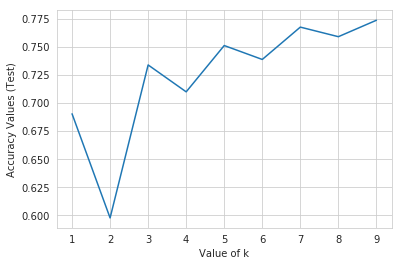

In [110]:
#Show the accuracies of each value of k on a graph

plt.plot(ks, mean_accuracy)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Values (Test)')

The value of k with the highest accuracy value is 7. The model will therefore be made with a k value of 7.  

In [111]:
knn_model = knn(n_neighbors = 7)
knn_model.fit(X_train, y_train)

knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

The model can now be used to predict the test set

In [112]:
knnyhat = knn_model.predict(X_test)
knnyhat[0:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

The train and test set accuracy can now be calculated

In [113]:
from sklearn import metrics

print("Train Set Accuracy Is:", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("Test Set Accuracy Is:", metrics.accuracy_score(y_test, knnyhat))

Train Set Accuracy Is: 0.7875433448919712
Test Set Accuracy Is: 0.7676556280520334


This level of accuracy is promising. 

In [114]:
from sklearn.metrics import f1_score

f1_score(y_test, knnyhat, average = 'weighted')

0.709307593722371

This score is fairly strong

In [115]:
from sklearn.metrics import jaccard_similarity_score

jaccard_similarity_score(y_test, knnyhat)

0.7676556280520334

This score is, once again, fairly strong.

#### Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
depth_range = range(1,10)

f1 = []

ja = []


for d in depth_range:
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = d)
    dt.fit(X_train, y_train)
    dt_yhat = dt.predict(X_test)
    print(dt_yhat [0:5])
    print(y_test [0:5])
    f1.append(f1_score(y_test, dt_yhat, average='weighted'))
    ja.append(jaccard_similarity_score(y_test, dt_yhat))

import pandas as pd
    
resultsofaccuracytesting = pd.DataFrame(f1, index = ['d=1', 'd=2', 'd=3', 'd=4', 'd=5', 'd=6', 'd=7', 'd=8', 'd=9'])

resultsofaccuracytesting.columns = ['F1 SCORE']
resultsofaccuracytesting.insert(loc=1, column = "JACCARD", value = ja)
resultsofaccuracytesting.name = 'DEPTH'

resultsofaccuracytesting

[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 3]


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 3]


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 3]


,F1 SCORE,JACCARD
d=1,0.700849,0.792564
d=2,0.700849,0.792564
d=3,0.700849,0.792564
d=4,0.700849,0.792564
d=5,0.700849,0.792564
d=6,0.700768,0.792400
d=7,0.700828,0.792523
d=8,0.700989,0.791908
d=9,0.701439,0.791087


It seems that scores are marginally higher from d=1 to d=5. The scores themselves are relatively strong.

So, let's build a decision tree model using d=5. 

In [118]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dt_model.fit(X_train, y_train)
dt_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Support Vector Machine

In [119]:
from sklearn import svm

In [ ]:
kernel_functions = ['sigmoid', 'poly', 'rbf', 'linear']
accuracy_score = []

for k in kernel_functions:
    svm_model = svm.SVC(kernel=k)
    svm_model.fit(X_train, y_train)
    svm_yhat = svm_model.predict(X_test)
    
    accuracy_score.append(f1_score(y_test, svm_yhat, average = 'weighted'))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
y_p = np.arange(len(kernel_functions))

plt.bar(y_p, accuracy_score, align = 'center', alpha = 0.7)
plt.xticks(y_p, kernel_functions)
plt.xlabel('Kernel Functions')
plt.ylabel('Accuracy')

plt.show

It seems that a sigmoid kernel function won't be as effective as the others. A linear kernel function will be used.

In [ ]:
new_model = svm.SVC(C=0.01, gamma = 'auto', kernel = 'linear')
new_model.fit(X_train, y_train)
new_model

### Results and Discussion <a name="resultsanddiscussion"></a>

The results of the data analysis and visualisaton, and of the modelling, are promising; they will be summarized and discussed here.

These results reveal several changes which drivers can make in order to reduce their risk of having an accident, or a severe accident, on the road in the UK. 

1. Results of the Speed Limit Analysis

This analysis showed that one is most likely to have an accident with slight injury in a 30 mph area, and most likely to have a fatal accident in a 60 mph area.

It interestingly showed that you're more likely to have a fatal accident in a 30 zone than a 40 zone; in analysing this, we must remember that this dataset includes pedestrian deaths, and that most 30 areas are in residential zones, where pedestrians may be present, while most 40 zones are on A Roads and B Roads, where they are less likely to be.

Drivers should be careful in 30 zones for obstacles, and in 60 zones for serious hazards. Interestingly, the fact that there were fewer accidents in 70 zones than 60 zones would imply that fast a-roads (with worse maintenance and more bends) are more dangerous than motorways. 

2. Results of the Lighting Conditions Analysis

This analysis showed that most accidents occur in daylight (1). This is unsurprising, as it seems heuristically sensible to assume that most car journeys take place in daylight. More interestingly, it seems that very few accidents take place in darkness, with lights unlit (5). This would suggeset that the British public tends to abide by this particular road safety guideline very well. There are plenty of accidents which occur in darkness, with lights lit (4) (this correlates with the notion that many accidents occur in 30 mph zones, where street lights are in place), and fewer in darkness with no lighting (6). Perhaps this reflects the notion that people are happier to drive at night in urban areas (which will be lit) than rural areas (which will not be lit).

Drivers should not assume that driving in the day precludes you from having an accident, and should be aware of the relative hazards of driving in the dark. 

3. Results of the Date Analysis

There doesn't seem to be a noticeable correlation between accident severity and date at this level.

This would suggest that drivers needn't worry too much about the time of year when they set out (though they should worry about other factors which relate to time of year, such as weather conditions). 

There are individual days when there are few accidents (e.g. Christmas Day), but these are outliers.

4. Results of the Urban or Rural Area Analysis

This analysis would suggest that more accidents occur in urban areas than rural areas by a significant margin. The gap in slight accidents is large, but the gap in serious accidents and fatalities is much lesser. This is likely to be reflecting higher speeds in rural areas.

Drivers ought to be careful in urban areas, and not get complacent about the low speed limits and street lighting. 

As one can see, in Warwickshire, a county with some urban and some rural areas, the skew is not towards urban areas, but rural areas. 

This result, in comination with the bar chart earlier, would suggest that people cannot be complacent in rural areas, and should be looking out for different risks depending on where they live. 

For Warwickshire, and most likely other midlands counties with similar structures, like Gloucestershire and Worcestershire, you're more likely to have an accident in a rural area, but can't take your eye off the ball in urban areas either.

5. Results of the Number of Vehicles Analysis

This analysis shows that a lot of accidents occur involving 2 vehicles, and that the next most accidents occur with just a single vehicle. 

This is an interesting discovery. It implies two major things. Firstly, the fact that a very large number of accidents are slight and between two vehicles suggests that a lot of these indicents might involve one car rear-ending another (i.e. a fender bender). This should be noted when one reads accident data, and accounted for, when one drives. Secondly, the large number of injuries involving one vehicle implies that drivers should be very careful even when the road is empty - lapses in concentration, lost control etc. can lead to a single vehicle having an accident a lot of the time.

6. Results of the Day of Week Analysis

The most interesting thing which this shows is that there are fewer accidents on days 1 and 7 (Saturday and Sunday) i.e. the days when people are not going to work. This would suggest that driving in a rush (derived from needing to get to work, or trying to get home asap) and driving on days when there are more people on the roads, can be more dangerous.

Drivers should be particularly cautious on weekdays. 

7. Results of Road Conditions Analysis

The most important takeaway from this visualisation is the fact that dry conditions (1) do not protect you from being in an accident!

The results of the model are also very promising. All three are very effective at predicting accident severity, as the incredibly strong precision, recall, jaccard and F1 scores for the KNN model, the strong F1 and jaccard scores for the Decision Tree model, and the strong F1 score for the SVM model all show. The specific scores can be seen back in the 'Methodology' section. 

The fact that these scores are all so strong shows that data pre-processing was very effective, and that the large number of features used allowed for a strong set of models. 

It also shows that if you know these features (which you can before you set out on a drive), you can use the models to see how severe an accident you might have, if you were to have an accident, which could feasibly be very, very useful. 

### Conclusion <a name="conclusion"></a>

The aim of this project was to accurately predict the severity of an accident given a number of features, and to discern a number of ways, through data analysis, in which drivers can change their behaviour to be safer on the roads. The project has fulfilled both of these aims.

In closing, it seems most apt to provide a concise set of findings, which can be easily read by drivers, and used to change their behaviour:

1. Be cautious of obstacles and hazards in 30mph zones
2. Drive carefully on A and B roads with 60mph speed limits - they're more dangerous than motorways!
3. Driving in daylight does not preclude you from having an accident, but you should be careful at night.
4. You should be careful in both urban and rural areas, though your likelihood of having an accident in either depends on where you live.
5. A large number of slight accidents occur with 1 or 2 vehicles - be aware of other cars on the road, and be careful even when the road is empty - laspes in concentration, lost control etc. can lead to single vehicle accidents frequently. 
6. Drivers should be particularly cautious on weekdays
7. Dry conditions do not preclude you from having an accident. 